# Autograd basics

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torchviz import make_dot

# Scalar output

In [2]:
x = torch.tensor([1.0,2.0], requires_grad=True)
y = torch.tensor([4.0,5.0], requires_grad=True)

z = x**2 + y**3 + 2*x*y + 4

print(f"z: {z}")

z: tensor([ 77., 153.], grad_fn=<AddBackward0>)


In [3]:
loss = z.sum()
print(f"loss: {loss}")
loss.backward()

loss: 230.0


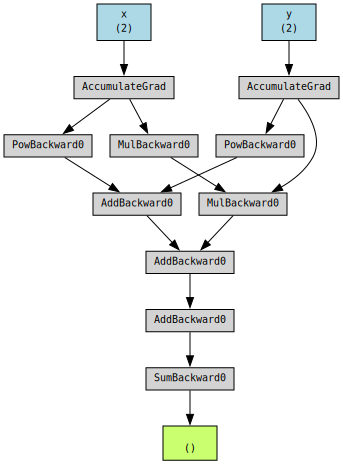

In [4]:
make_dot(loss, params={'x': x, 'y': y})

$z = x_1^2 + x_2^2 + y_1^3 + y_2^3 + 2x_1y_1 + 2 x_2y_2 + 4$

$\nabla_x z = \begin{pmatrix}
2 x_1 + 2 y_1 \\ 2 x_2 + 2 y_2 
\end{pmatrix} = \begin{pmatrix}
10 \\ 14
\end{pmatrix}$

$\nabla_y z = \begin{pmatrix}
3 y_1^2 + 2x_1 \\ 3 y_2^2 + 2x_2 
\end{pmatrix} = \begin{pmatrix}
50 \\ 79
\end{pmatrix}$

In [5]:
print(f"x.grad: {x.grad}")
print(f"y.grad: {y.grad}")

x.grad: tensor([10., 14.])
y.grad: tensor([50., 79.])


# Vector output, Jacobian

In [6]:
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)
y = torch.tensor([1.0,2.0,4.0], requires_grad=True)

A = torch.tensor([[1.0,1.0,1.0],[0.0,1.0,1.0],[0.0,0.0,2.0]])

z = x@y * torch.tensor([1.0,0.0]) + x@A@y * torch.tensor([0.0,1.0])

print(f"z: {z}")

z: tensor([17., 43.], grad_fn=<AddBackward0>)


$ x = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix} $
$ y = \begin{pmatrix} 1 \\ 2 \\ 4 \end{pmatrix} $
$ A = \begin{pmatrix} 
    1 & 1 & 1 \\
    0 & 1 & 1 \\ 
    0 & 0 & 2 \end{pmatrix} $

$ z = \begin{pmatrix}
    x^Ty \\ x^TAy
\end{pmatrix} : \mathbb{R}^6 \rightarrow \mathbb{R}^2$

$ \nabla z = \begin{pmatrix}
\nabla_x x^Ty & \nabla_y x^Ty \\
\nabla_x x^TAy & \nabla_y x^TAy
\end{pmatrix} = \begin{pmatrix}
y^T & x^T \\
y^TA^T & x^TA
\end{pmatrix} : 2 \times 6$

$ \nabla z^T @ \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} y \\ x \end{pmatrix} = \begin{pmatrix} 1 & 2 & 4 \\ 1 & 2 & 3 \end{pmatrix}$

$ \nabla z^T @ \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} Ay \\ A^Tx \end{pmatrix} = \begin{pmatrix} 7 & 6 & 8 \\ 1 & 3 & 9 \end{pmatrix}$

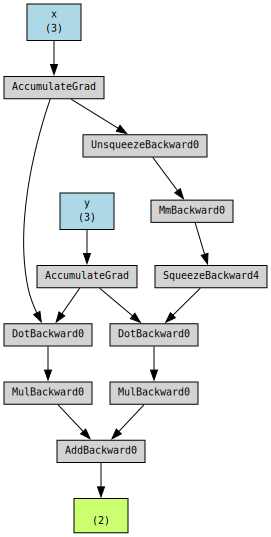

In [7]:
make_dot(z, params={'x': x, 'y': y})

In [8]:
v = torch.tensor([1.0, 0.0])
nabla_z_1 = torch.autograd.grad(z, (x, y), v, retain_graph=True)
print(nabla_z_1)

(tensor([1., 2., 4.]), tensor([1., 2., 3.]))


In [9]:
v = torch.tensor([0.0, 1.0])
nabla_z_2 = torch.autograd.grad(z, (x, y), v, retain_graph=True)
print(nabla_z_2)

(tensor([7., 6., 8.]), tensor([1., 3., 9.]))


# Clone and detach

x_clone: tensor([1., 2., 3.], grad_fn=<CloneBackward0>)


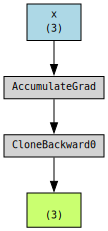

In [10]:
# CLONE : make a copy, retain the computation graph
x_clone = x.clone()
print(f"x_clone: {x_clone}")

make_dot(x_clone, params={'x': x, 'y': y})

x_detach: tensor([1., 2., 3.])


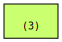

In [11]:
# DETACH : make a copy, break the computation graph
x_detach = x.detach()
print(f"x_detach: {x_detach}")
make_dot(x_detach, params={'x': x, 'y': y})